In [1]:
import sys
sys.path.append('..')
from qtn.bimax import BiMax
from qtn.util import (boltzmann, emass, echarge, permittivity, cspeed, fperp, fp)
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ant_len = 3      # m (monopole) 
ant_rad = 0.02  # m
base_cap = 35e-12 # Farad
fbins = np.linspace(1000, 500e3, 100)

In [3]:
qe = 1.60217662e-19
me = 9.10938356e-31
kB = 1.38064852e-23
eps0 = 8.854187817e-12
def Ld (n, T):
    """ Calculates the Debye length in m.
    n: number density in m^-3
    T: temperature in K

    """
    return np.sqrt(eps0*kB*T/(n*qe**2))

def wp(n):
    """ Calculates the plasma frequency in rad*Hz.
    n: number density in m^-3
    T: temperature in K

    """
    return np.sqrt(n*qe**2/(me*eps0))

def fp(n):
    """ Calculates the plasma frequency in Hz.
    n: number density in m^-3
    T: temperature in K

    """
    return wp(n)/2/np.pi

In [4]:
vsw=3.966e5 #what is this?
tc = 1 * echarge/boltzmann # 1 eV

t = 6.57  # what is this
tep = 9.91/9.62 #what is this
ne = 500e6 # in m^-3
fpe = fp(ne) 

In [5]:
n = 0.026
nc = ne/(1+n)  #what is this supposed to be?
ldc = Ld(ne, tc)
lrel = ant_len/ldc

In [6]:
p = BiMax(ant_len, ant_rad, base_cap)

In [7]:
wrelplot = fbins/fpe

In [8]:
g_s = np.array([p.gamma_shot(wrel, lrel, n, t, tc) for wrel in wrelplot])

In [9]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40
    else:
        mp.mp.dps = 20
    return p.bimax(wrel, lrel, n, t, tc)

In [10]:
enoise = np.array([helper(wrel) for wrel in wrelplot])

In [11]:
pnoise = np.array([p.proton_old(wrel*np.sqrt(1+n), lrel, tep, tc, vsw) for wrel in wrelplot])

In [12]:
gamma = g_s[:, 0]
shot = g_s[:, 1]
vr2 = enoise + pnoise + shot

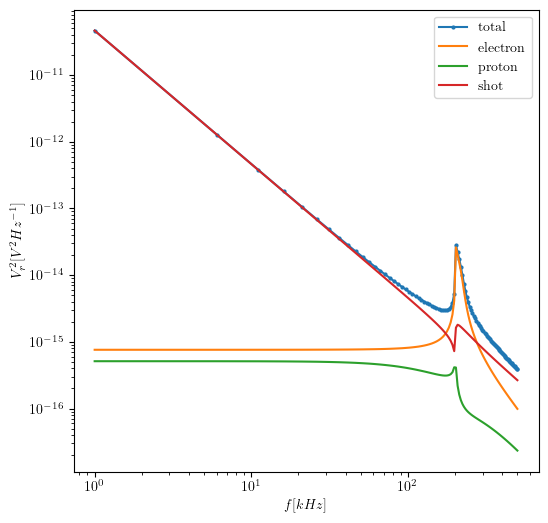

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, 'o-', markersize=2, label='total')
plt.plot(fbins/1000, enoise/gamma, label='electron')
plt.plot(fbins/1000, pnoise/gamma, label='proton')
plt.plot(fbins/1000, shot/gamma, label='shot')
plt.xscale('log')
plt.yscale('log')
#plt.xlim([4, 256])
#plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.legend(loc='best')
plt.show()

In [14]:
fig.savefig('lusee-night.png', dpi=300)

In [15]:
fpe

200769.00389395512

In [16]:
ldc

0.3324559554510424